# QSE 2026

# Data import

In [1]:
# --- Data import block for Google Colab ---

import os
import pandas as pd

# Create the 'charts' directory if it doesn't exist
charts_folder = "charts"
os.makedirs(charts_folder, exist_ok=True)

# Attempt to read 'papers.csv' directly
try:
    df = pd.read_csv("papers.csv", encoding='utf-8-sig', sep=None, engine='python')
except FileNotFoundError:
    # If running in Google Colab and file not found, upload it manually
    from google.colab import files
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    df = pd.read_csv(file_name, encoding='utf-8-sig', sep=None, engine='python')

# Display the list of columns and the first few rows
print("Available columns:", df.columns.tolist())
df.head()

Available columns: ['ID', 'Authors', 'Author full names', 'Affiliations', 'Title', 'Year', 'Source Title', 'Type of Source Title', 'Source Title Abbreviation', 'Page Start', 'Page End', 'Cited by', 'Abstract', 'Author Keyword', 'Index Keyword', 'Language', 'Document Type', 'Type of Study', 'Research Type of Primary Studies', 'SWEBOK', 'Study goal and contribution', 'Study review', 'SE area', 'Observations']


,ID,Authors,Author full names,Affiliations,Title,Year,Source Title,Type of Source Title,Source Title Abbreviation,Page Start,...,Index Keyword,Language,Document Type,Type of Study,Research Type of Primary Studies,SWEBOK,Study goal and contribution,Study review,SE area,Observations
0,SCP0525,Zhang X.; Wen Q.; Zhu F.,"Zhang, Xiufeng (37092283100); Wen, Qiaoyan (70...",Beijing University of Posts and Telecommunicat...,Object-oriented quantum cryptography simulatio...,2007,International Conference on Natural Computation,Science,"Proc Int Conf Natural Comput, ICNC",599.0,...,Computer simulation; Mathematical models; Quan...,English,Conference Paper,Primary Study,Proposal of solution,Software Engineering Models and Methods,O artigo propõe um modelo de simulação de crip...,As principais contribuições incluem o desenvol...,﻿Object-oriented quantum model,NaN
1,SCP0279,Khan A.A.; Akbar M.A.; Lahtinen V.; Paavola M....,"Khan, Arif Ali (26434399300); Akbar, Muhammad ...",M3S Empirical Software Engineering Research Un...,Agile meets quantum: a novel genetic algorithm...,2024,Automated Software Engineering,Software Engineering,ASE Journal,0.0,...,Barium compounds; Cost reduction; Forecasting;...,English,Article,Primary Study,Evaluation research,Software Engineering Management,O artigo tem como objetivo investigar a aplica...,O estudo revela que práticas ágeis podem ser p...,Quantum agile software development process,NaN
2,SCP0024,Khan A.A.; Akbar M.A.; Ahmad A.; Fahmideh M.; ...,"Khan, Arif Ali (26434399300); Akbar, Muhammad ...","University of Oulu, M3S Empirical Software Eng...",Agile Practices for Quantum Software Developme...,2023,International Conference on Quantum Software,Quantum Software Engineering,QSW,9.0,...,Application programs; Quantum theory; Agile pr...,English,Conference Paper,Primary Study,Evaluation research,Software Engineering Process,O artigo tem como objetivo investigar em que m...,O artigo apresenta uma taxonomia de práticas á...,Quantum agile software development process,NaN
3,SCP0310,Marchesi L.; Marchesi M.; Tonelli R.,"Marchesi, Lodovica (57202705397); Marchesi, Mi...",Department of Mathematics and Computer Science...,A survey on Cryptoagility and Agile Practices ...,2025,Information and Software Technology,Software Engineering,INFSOF,0.0,...,Software design; 'current; Agile Methodologies...,English,Article,Primary Study,Evaluation research,Software Engineering Process,O artigo tem como objetivo investigar como prá...,O artigo tem como objetivo investigar como prá...,Quantum agile software development process,NaN
4,SCP0390,De Vincentiis M.; Cassano F.; Pagano A.; Picci...,"De Vincentiis, Mirko (57991605400); Cassano, F...","University of Bari, Italy",QAI4ASE: Quantum artificial intelligence for a...,2022,International Workshop on Quantum Programming ...,Quantum Software Engineering,QP4SE,19.0,...,Application programs; Artificial intelligence;...,English,Conference Paper,Primary Study,Proposal of solution,Software Engineering Models and Methods,O artigo tem como objetivo apresentar um model...,O artigo tem como objetivo apresentar um model...,Quantum Artificial Intelligence for Automotive...,NaN


# VARIABLES

In [2]:
# Chart setup

CHART_TEXT_SIZE = 18
CHART_TITLE_SIZE = 26
CHART_XLABEL_SIZE = 20
CHART_YLABEL_SIZE = 20
CHART_XTICKS_SIZE = 22
CHART_YTICKS_SIZE = 22
CHART_LEGEND_SIZE = 20
CHART_LEGEND_TITLE_SIZE = 22

# RQ1 - What is the temporal distribution and in which locations were the studies published?

## Temporal distribution

### Number of publications

In [3]:
import pandas as pd
from google.colab import files

# Remover linhas com ano ausente e converter para inteiro
df = df[df['Year'].notna()]
df['Year'] = df['Year'].astype(int)

# Agrupar por ano e contar publicações
publications_per_year = df['Year'].value_counts().sort_index()

# Imprimir resultado
print("Número de publicações por ano:\n")
for year, count in publications_per_year.items():
    print(f"{int(year)}: {count}")

Número de publicações por ano:

2006: 2
2007: 1
2011: 1
2013: 1
2018: 2
2019: 2
2020: 4
2021: 21
2022: 24
2023: 35
2024: 39
2025: 8


### Growth from 2006 to 2024




In [4]:
# Growth from 2006 to 2024

# Filter only complete years from 2006 to 2024
start_year = 2006
end_year = 2024

# Count publications per year
pubs_per_year = df['Year'].value_counts().sort_index()

# Fill missing years with zero publications
for year in range(start_year, end_year + 1):
    if year not in pubs_per_year:
        pubs_per_year[year] = 0

# Sort again after filling
pubs_per_year = pubs_per_year.sort_index()

# Get start and end values
initial_value = pubs_per_year[start_year]
final_value = pubs_per_year[end_year]

# Calculate growth
absolute_growth = final_value - initial_value
percentage_growth = ((final_value - initial_value) / initial_value) * 100 if initial_value > 0 else float('inf')

# Print results
print(f"Absolute growth (2006–2024): {absolute_growth} publications")
print(f"Percentage growth (2006–2024): {percentage_growth:.2f}%")

Absolute growth (2006–2024): 37 publications
Percentage growth (2006–2024): 1850.00%


### Projection for 2025 using CAGR from 2021 to 2024

In [5]:
# Projection for 2025 using CAGR from 2021 to 2024

# Years for projection
start_proj_year = 2021
end_proj_year = 2024

v_i = pubs_per_year[start_proj_year]
v_f = pubs_per_year[end_proj_year]
n_years = end_proj_year - start_proj_year

# Calculate CAGR
cagr = (v_f / v_i) ** (1 / n_years) - 1 if v_i > 0 else 0

# Project 2025
projected_2025 = round(v_f * (1 + cagr))
print(f"Projected publications for 2025 (based on 2021–2024 CAGR of {cagr*100:.2f}%): {projected_2025}")

Projected publications for 2025 (based on 2021–2024 CAGR of 22.92%): 48


### Year  Chart

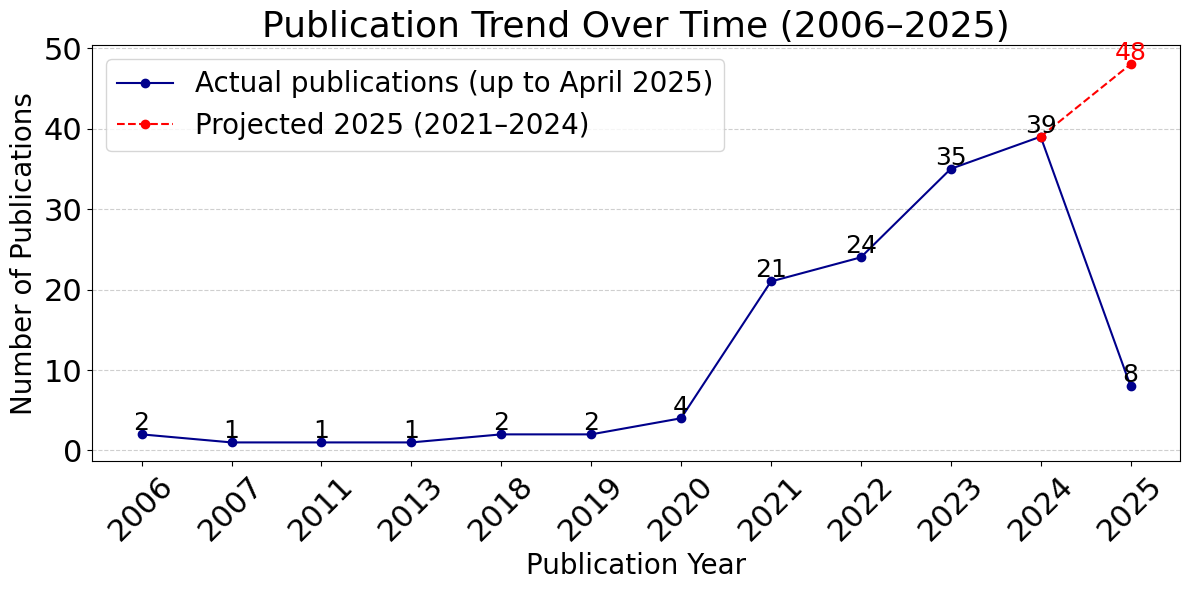

In [6]:
import matplotlib.pyplot as plt

# Prepare data for all years (2006–2025), filling missing years with 0
years_full = list(range(2006, 2026))
counts_real = [pubs_per_year.get(year, 0) for year in years_full]

# Get actual known value for 2025 (partial data, e.g., 8 publications)
actual_2025 = pubs_per_year.get(2025, 0)

# Build the list of years and values for actual data (including 2025 partial)
years_actual = []
counts_actual = []

for year, count in zip(years_full, counts_real):
    if count > 0 or year == 2025:  # Keep 2025 even if it's partial
        years_actual.append(str(year))
        counts_actual.append(actual_2025 if year == 2025 else count)

# Prepare projection from 2024 to 2025
proj_years = ['2024', '2025']
proj_counts = [pubs_per_year[2024], projected_2025]

# Plotting
plt.figure(figsize=(12, 6))

# Line 1 – actual data
plt.plot(
    years_actual,
    counts_actual,
    marker='o',
    linestyle='-',
    color='darkblue',
    label='Actual publications (up to April 2025)'
)

# Line 2 – projection (dashed line)
plt.plot(
    proj_years,
    proj_counts,
    marker='o',
    linestyle='--',
    color='red',
    label='Projected 2025 (2021–2024)'
)

# Annotate all actual values
for i, count in enumerate(counts_actual):
    plt.text(years_actual[i], count + 0.5, str(count), ha='center', fontsize=CHART_TEXT_SIZE, color='black')

# Annotate the projected value (in red)
plt.text('2025', projected_2025 + 0.5, str(projected_2025), ha='center', fontsize=CHART_TEXT_SIZE, color='red')

# Customize chart
plt.title('Publication Trend Over Time (2006–2025)', fontsize=CHART_TITLE_SIZE)
plt.xlabel('Publication Year', fontsize=CHART_XLABEL_SIZE)
plt.ylabel('Number of Publications', fontsize=CHART_YLABEL_SIZE)
plt.xticks(rotation=45, fontsize=CHART_XTICKS_SIZE)
plt.yticks(fontsize=CHART_YTICKS_SIZE)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=CHART_LEGEND_SIZE)
plt.tight_layout()

# Save the figure
plt.savefig("charts/chart_publication_trend.pdf", format='pdf')

# Show the plot
plt.show()

## Venues

### Number of publication per venue

In [7]:
import pandas as pd
import unicodedata

# Load the dataset
df = pd.read_csv("papers.csv", encoding='utf-8-sig', sep=None, engine='python')

# Function to normalize venue names
def normalize_venue(name):
    if pd.isna(name):
        return "Unknown"
    # Remove accents
    name = unicodedata.normalize('NFKD', name).encode('ASCII', 'ignore').decode('utf-8')
    # Strip spaces, convert to lowercase, remove extra internal spaces
    name = " ".join(name.strip().lower().split())
    return name

# Create a new column with normalized venue names
df['Normalized Source Title'] = df['Source Title'].apply(normalize_venue)

# Count publications per normalized venue
venue_counts = df['Normalized Source Title'].value_counts()

# Print the results in descending order
print("Number of studies per publication venue (normalized, descending order):\n")
for venue, count in venue_counts.items():
    print(f"{venue.title()}: {count}")

# Print the total number of publications
total_publications = venue_counts.sum()
print(f"\nTotal number of publications: {total_publications}")

Number of studies per publication venue (normalized, descending order):

International Conference On Quantum Computing And Engineering: 14
International Conference On Quantum Software: 8
International Workshop On Quantum Software Engineering: 8
International Workshop On Quantum Software Engineering And Technology: 6
International Conference On Automated Software Engineering: 6
Information And Software Technology: 6
International Conference On Software Engineering: 5
Transactions On Software Engineering: 4
International Conference On Software Analysis, Evolution And Reengineering: 4
International Workshop On Quantum Programming For Software Engineering: 4
International Conference On Software Architecture Companion: 3
International Workshop On Quantum Software Engineering: The Next Evolution: 3
International Conference On Software Quality, Reability And Security: 2
International Conference On Software Engineering: New Ideas And Emerging Results: 2
Transactions On Software Engineering And

### Number of publications per type of venue

In [8]:
import pandas as pd
import unicodedata

# Load the dataset
df = pd.read_csv("papers.csv", encoding='utf-8-sig', sep=None, engine='python')

# Function to normalize type names
def normalize_type(name):
    if pd.isna(name):
        return "Unknown"
    # Remove accents and normalize text
    name = unicodedata.normalize('NFKD', name).encode('ASCII', 'ignore').decode('utf-8')
    name = " ".join(name.strip().lower().split())
    return name

# Normalize the 'Type of Source Title' column
df['Normalized Source Type'] = df['Type of Source Title'].apply(normalize_type)

# Count publications per type
type_counts = df['Normalized Source Type'].value_counts()

# Print the results
print("Number of studies per type of source title (normalized, descending order):\n")
for t, count in type_counts.items():
    print(f"{t.title()}: {count}")

# Print total
total_type_publications = type_counts.sum()
print(f"\nTotal number of publications: {total_type_publications}")

Number of studies per type of source title (normalized, descending order):

Software Engineering: 65
Quantum Software Engineering: 29
Quantum Computing And/Or Information: 20
Computer Science: 19
Science: 3
Engineering: 3
Mathematics: 1

Total number of publications: 140


### Number of studies per document type

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("papers.csv", encoding='utf-8-sig', sep=None, engine='python')

# Normalize the 'Document Type' column (strip spaces, lower -> title case for display)
df['Document Type Normalized'] = df['Document Type'].astype(str).str.strip().str.title()

# Count frequency of each document type
doc_type_counts = df['Document Type Normalized'].value_counts()

# Print the results
print("Number of studies per document type (descending order):\n")
for doc_type, count in doc_type_counts.items():
    print(f"{doc_type}: {count}")

# Print total
total_documents = doc_type_counts.sum()
print(f"\nTotal number of documents: {total_documents}")

Number of studies per document type (descending order):

Conference Paper: 98
Article: 42

Total number of documents: 140


### Document Type x Type of Source Title

In [10]:
import pandas as pd

# Verifica se as colunas esperadas existem
if 'Document Type' not in df.columns or 'Type of Source Title' not in df.columns:
    raise ValueError("As colunas 'Document Type' e 'Type of Source Title' devem estar no arquivo.")

# Agrupa por Document Type e Type of Source Title e conta os artigos
grouped = df.groupby(['Document Type', 'Type of Source Title']).size().reset_index(name='Count')

# Ordena por Document Type e depois por maior número de artigos
grouped = grouped.sort_values(by=['Document Type', 'Count'], ascending=[True, False])

# Exibe em formato textual organizado
print("Publications count per area Document Type and Type of Source Title:\n")
for doc_type in grouped['Document Type'].unique():
    print(f"{doc_type}")
    subset = grouped[grouped['Document Type'] == doc_type]
    for _, row in subset.iterrows():
        print(f"    - {row['Type of Source Title']}: {row['Count']} publication(s)")
    print()

Publications count per area Document Type and Type of Source Title:

Article
    - Software Engineering: 24 publication(s)
    - Computer Science: 8 publication(s)
    - Quantum Computing and/or Information: 5 publication(s)
    - Engineering: 3 publication(s)
    - Science: 2 publication(s)

Conference Paper
    - Software Engineering: 41 publication(s)
    - Quantum Software Engineering: 29 publication(s)
    - Quantum Computing and/or Information: 15 publication(s)
    - Computer Science: 11 publication(s)
    - Mathematics: 1 publication(s)
    - Science: 1 publication(s)



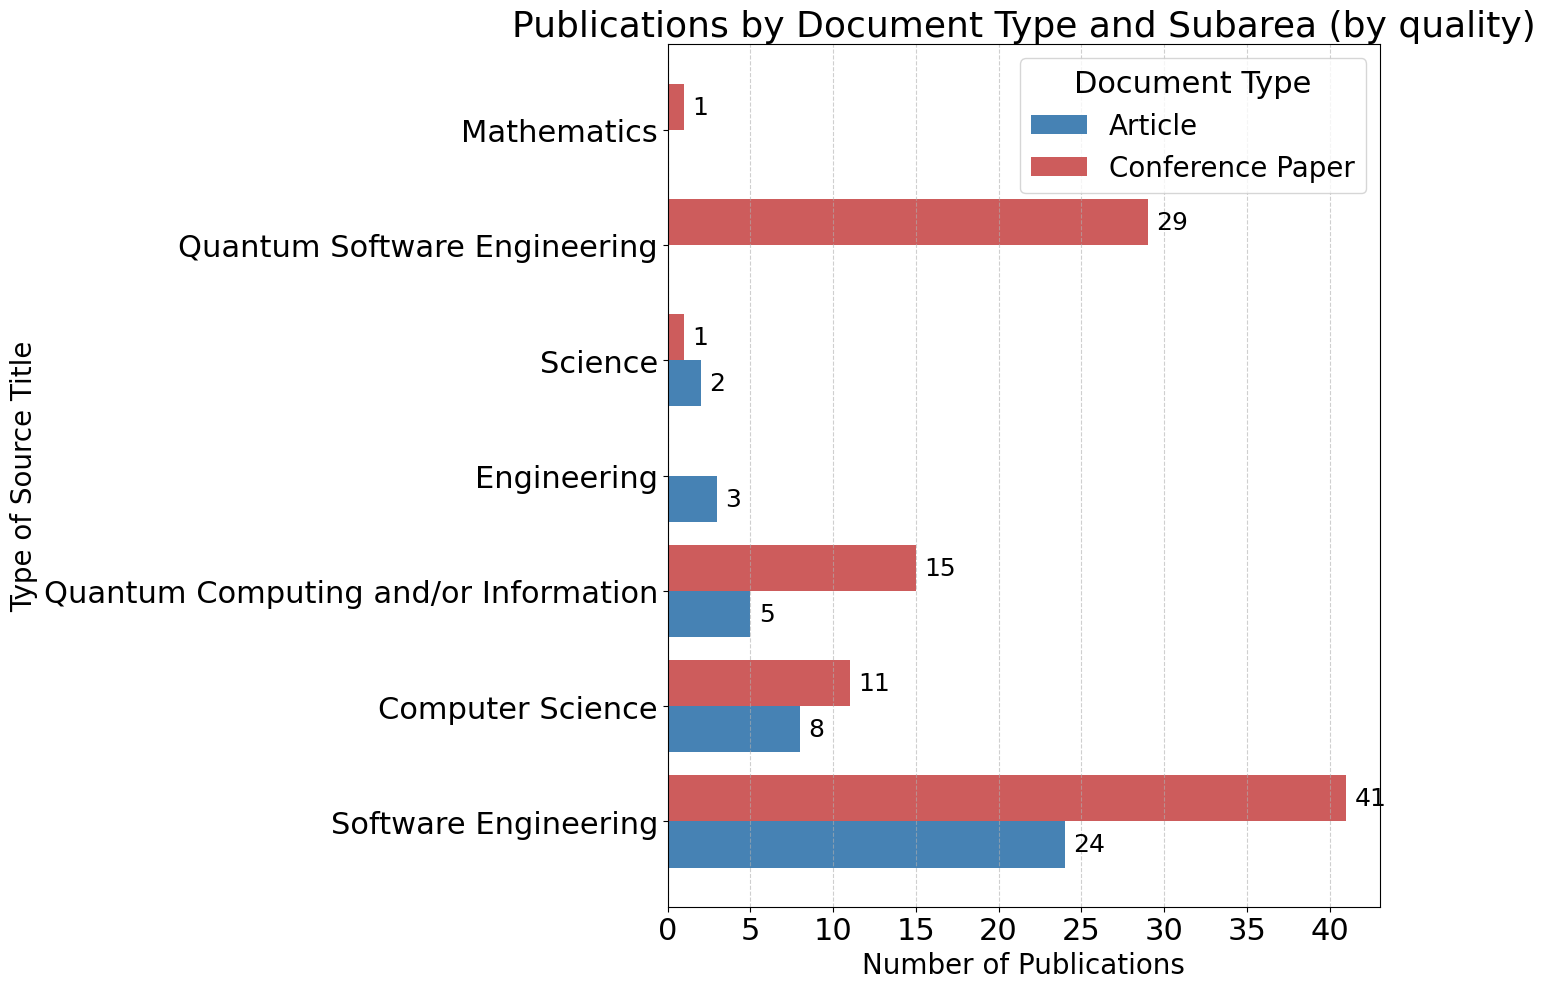

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# === Configurações do gráfico ===
CHART_TEXT_SIZE = 18
CHART_TITLE_SIZE = 26
CHART_XLABEL_SIZE = 20
CHART_YLABEL_SIZE = 20
CHART_XTICKS_SIZE = 22
CHART_YTICKS_SIZE = 22
CHART_LEGEND_SIZE = 20
CHART_LEGEND_TITLE_SIZE = 22

# === Verificação das colunas ===
if 'Document Type' not in df.columns or 'Type of Source Title' not in df.columns:
    raise ValueError("As colunas 'Document Type' e 'Type of Source Title' devem estar no arquivo.")

# === Agrupamento ===
grouped = df.groupby(['Document Type', 'Type of Source Title']).size().reset_index(name='Count')

# === Ordenar áreas pela qualidade: mais artigos (revistas) primeiro, depois total ===
pivot = grouped.pivot(index='Type of Source Title', columns='Document Type', values='Count').fillna(0)
pivot['Total'] = pivot.sum(axis=1)
pivot = pivot.sort_values(by=['Article', 'Total'], ascending=[False, False])

ordered_areas = pivot.index.tolist()
document_types = grouped['Document Type'].unique()
colors = ['steelblue', 'indianred']
bar_data = {doc_type: [] for doc_type in document_types}

# === Preencher dados ===
for area in ordered_areas:
    for doc_type in document_types:
        match = grouped[(grouped['Type of Source Title'] == area) & (grouped['Document Type'] == doc_type)]
        count = int(match['Count'].values[0]) if not match.empty else 0
        bar_data[doc_type].append(count)

# === Plotar gráfico ===
plt.figure(figsize=(14, 10))
y_pos = range(len(ordered_areas))
bar_width = 0.4

for i, doc_type in enumerate(document_types):
    offset = (i - 0.5) * bar_width
    plt.barh(
        [y + offset for y in y_pos],
        bar_data[doc_type],
        height=bar_width,
        label=doc_type,
        color=colors[i % len(colors)]
    )
    # Adicionar rótulos
    for y, count in zip(y_pos, bar_data[doc_type]):
        if count > 0:
            plt.text(count + 0.5, y + offset, str(count), va='center', fontsize=CHART_TEXT_SIZE)

# === Estilização ===
plt.yticks(ticks=y_pos, labels=ordered_areas, fontsize=CHART_YTICKS_SIZE)
plt.xticks(fontsize=CHART_XTICKS_SIZE)
plt.xlabel('Number of Publications', fontsize=CHART_XLABEL_SIZE)
plt.ylabel('Type of Source Title', fontsize=CHART_YLABEL_SIZE)
plt.title('Publications by Document Type and Subarea (by quality)', fontsize=CHART_TITLE_SIZE)
plt.legend(title='Document Type', fontsize=CHART_LEGEND_SIZE, title_fontsize=CHART_LEGEND_TITLE_SIZE)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# === Salvar gráfico ===
import os
os.makedirs("charts", exist_ok=True)
plt.savefig("charts/chart_document_type_by_area.pdf", format='pdf')

# === Mostrar gráfico ===
plt.show()

### Top 10 Source Title x Type of Source Title

In [12]:
import pandas as pd
import unicodedata

# Load dataset
df = pd.read_csv("papers.csv", encoding='utf-8-sig', sep=None, engine='python')

# Normalization function
def normalize(text):
    if pd.isna(text):
        return "Unknown"
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    return " ".join(text.strip().lower().split())

# Normalize Source Title and Type of Source Title
df['Normalized Source Title'] = df['Source Title'].apply(normalize)
df['Normalized Type'] = df['Type of Source Title'].apply(normalize)

# Top 10 Source Titles
top_venues = df['Normalized Source Title'].value_counts().head(10)

# Get representative display names and types
display_names = df.drop_duplicates('Normalized Source Title').set_index('Normalized Source Title')['Source Title']
venue_types = df.groupby('Normalized Source Title')['Normalized Type'].agg(lambda x: x.mode().iloc[0])

# Prepare results
print("Top 10 Source Titles with Type of Source and Number of Publications:\n")
type_summary = {}

for venue, count in top_venues.items():
    original_name = display_names.get(venue, venue.title())
    venue_type = venue_types.get(venue, "Unknown").title()
    print(f"- {original_name}: {count} publications ({venue_type})")

    if venue_type in type_summary:
        type_summary[venue_type] += count
    else:
        type_summary[venue_type] = count

# Summary by type
print("\nSummary of Publications by Type of Source (Top 10 only):")
for type_name, total in type_summary.items():
    print(f"- {type_name}: {total}")

Top 10 Source Titles with Type of Source and Number of Publications:

- International Conference on Quantum Computing and Engineering: 14 publications (Quantum Computing And/Or Information)
- International Conference on Quantum Software: 8 publications (Quantum Software Engineering)
- International Workshop on Quantum Software Engineering: 8 publications (Quantum Software Engineering)
- International Workshop on Quantum Software Engineering and Technology: 6 publications (Quantum Software Engineering)
- International Conference on Automated Software Engineering: 6 publications (Software Engineering)
- Information and Software Technology: 6 publications (Software Engineering)
- International Conference on Software Engineering: 5 publications (Software Engineering)
- Transactions on Software Engineering: 4 publications (Software Engineering)
- International Conference on Software Analysis, Evolution and Reengineering : 4 publications (Software Engineering)
- International Workshop on Qua

### Top 10 Venues

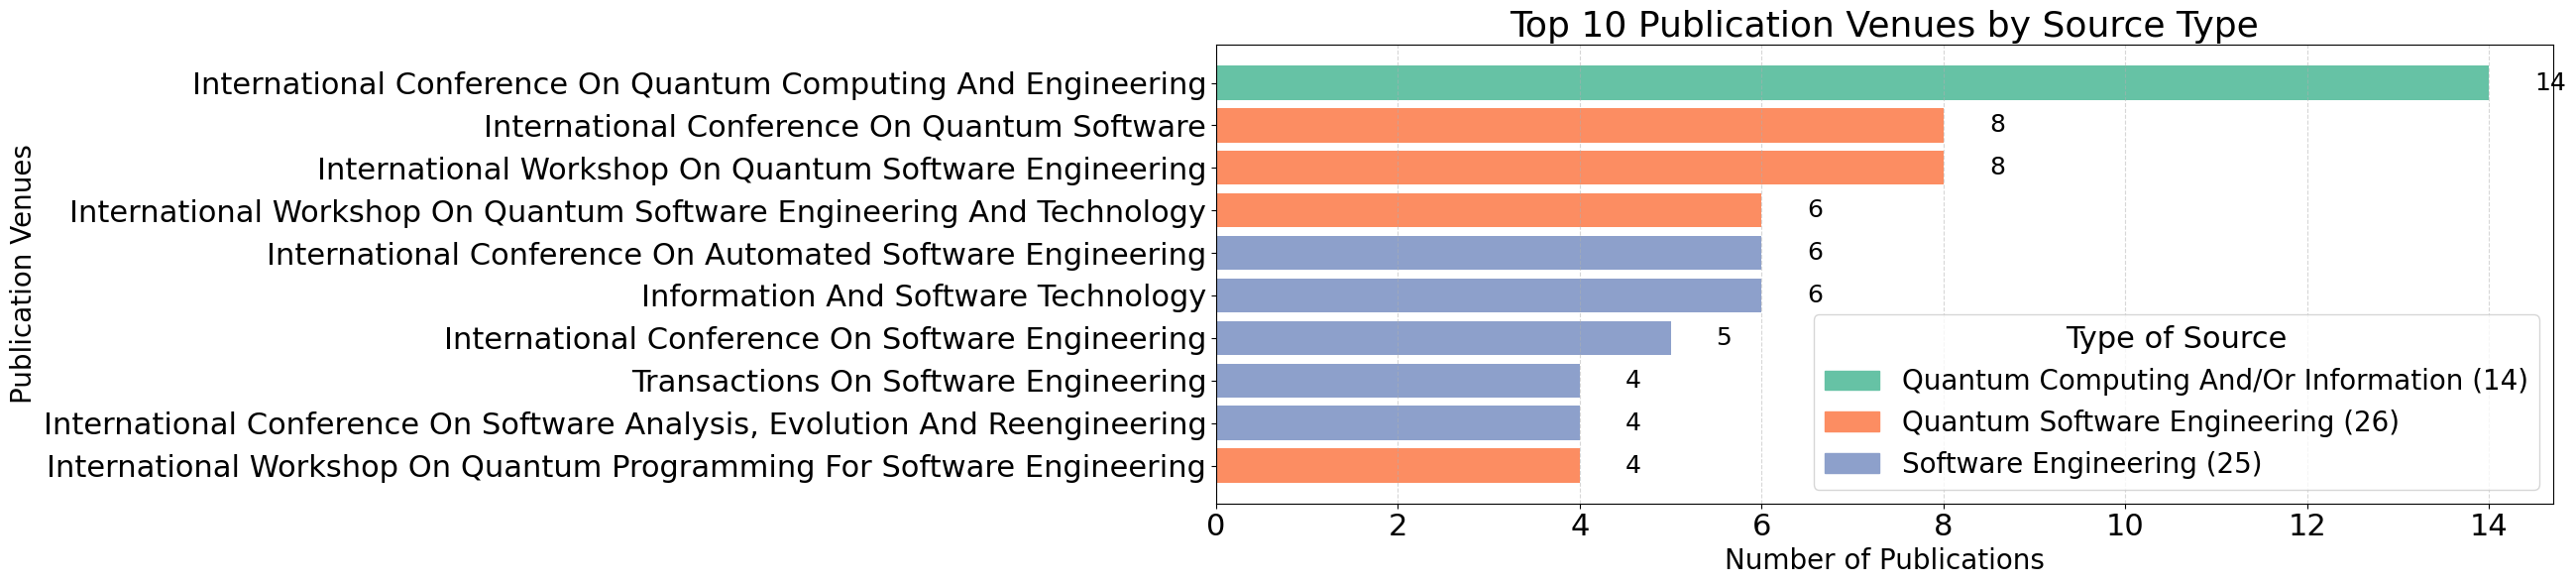

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

# === FUNÇÃO DE NORMALIZAÇÃO ===
def normalize(text):
    if pd.isna(text):
        return "Unknown"
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    return " ".join(text.strip().lower().split())

# Normalize columns
df['NORMALIZED_SOURCE_TITLE'] = df['Source Title'].apply(normalize)
df['NORMALIZED_SOURCE_TYPE'] = df['Type of Source Title'].apply(normalize)

# === TOP 10 VENUES ===
top_venues = df['NORMALIZED_SOURCE_TITLE'].value_counts().head(10)

# Get most frequent type for each top venue
type_mapping = (
    df[df['NORMALIZED_SOURCE_TITLE'].isin(top_venues.index)]
    .groupby('NORMALIZED_SOURCE_TITLE')['NORMALIZED_SOURCE_TYPE']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown')
)

# Prepare data
labels = [venue.title() for venue in top_venues.index]
counts = top_venues.values
types = [type_mapping[venue].title() for venue in top_venues.index]

# === CORES POR TIPO ===
unique_types = sorted(set(types))
color_map = {
    t: c for t, c in zip(unique_types, plt.cm.Set2.colors[:len(unique_types)])
}
colors = [color_map[t] for t in types]

# === CONTAGEM POR TIPO PARA LEGENDA ===
type_counts = {}
for t, c in zip(types, counts):
    type_counts[t] = type_counts.get(t, 0) + c

# Mapeia tipo -> "Tipo (quantidade)"
label_map = {t: f"{t} ({type_counts[t]})" for t in unique_types}

# === PLOTAGEM ===
plt.figure(figsize=(26, 6))
bars = plt.barh(labels, counts, color=colors)

# Eixos e Título
plt.xlabel("Number of Publications", fontsize=CHART_XLABEL_SIZE)
plt.ylabel("Publication Venues", fontsize=CHART_YLABEL_SIZE)
plt.title("Top 10 Publication Venues by Source Type", fontsize=CHART_TITLE_SIZE)
plt.xticks(fontsize=CHART_XTICKS_SIZE)
plt.yticks(fontsize=CHART_YTICKS_SIZE)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Rótulos nas barras
for bar, count in zip(bars, counts):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             str(count), va='center', fontsize=CHART_TEXT_SIZE)

# Legenda com contagem por tipo
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[t]) for t in unique_types]
labels_for_legend = [label_map[t] for t in unique_types]
plt.legend(handles, labels_for_legend, title="Type of Source",
           fontsize=CHART_LEGEND_SIZE, title_fontsize=CHART_LEGEND_TITLE_SIZE)

plt.tight_layout()
plt.savefig("charts/chart_top_10_venues_by_type.pdf", format='pdf')
plt.show()

# RQ2 - Who are the most influential institutions, researchers and countries in QSE

### Researchers

In [14]:
import pandas as pd
import unicodedata
import re
from collections import Counter, defaultdict

# === Normalize author (removendo acentos, pontuação etc.) ===
def normalize_name(name):
    if pd.isna(name) or not isinstance(name, str):
        return None
    name = unicodedata.normalize('NFKD', name).encode('ASCII', 'ignore').decode('utf-8')
    name = re.sub(r'[^a-zA-Z\s]', '', name)
    name = re.sub(r'\s+', ' ', name.strip())
    return name.lower()

# === Dicionários para contagem e nomes originais ===
author_counter = Counter()
original_names_map = defaultdict(list)

# === Processar a coluna "Author full names" ===
for authors_str in df['Author full names'].dropna():
    authors = authors_str.split(';')
    for author in authors:
        # Remove o ID entre parênteses, se existir
        cleaned = re.sub(r'\s*\(.*?\)', '', author).strip()
        normalized = normalize_name(cleaned)
        if normalized:
            author_counter[normalized] += 1
            original_names_map[normalized].append(cleaned)

# === Criar lista com nome mais frequente original + contagem ===
formatted_authors = []

for norm_name, count in author_counter.items():
    most_common_name = Counter(original_names_map[norm_name]).most_common(1)[0][0]
    formatted_authors.append((most_common_name, count))

# === Criar DataFrame ordenado ===
df_authors = pd.DataFrame(formatted_authors, columns=["Author", "Publication Count"])
df_authors = df_authors.sort_values(by="Publication Count", ascending=False).reset_index(drop=True)

# Mostrar todos
pd.set_option('display.max_rows', None)
print("Extracted and grouped authors:\n")
print(df_authors)

Extracted and grouped authors:

                                  Author  Publication Count
0                        Piattini, Mario                 12
1                    Garcia-Alonso, Jose                 11
2                           Ali, Shaukat                 10
3                               Yue, Tao                 10
4                         Arcaini, Paolo                  9
5                          Zhao, Jianjun                  9
6                        Moguel, Enrique                  9
7                        Mikkonen, Tommi                  9
8                Pérez-Castillo, Ricardo                  8
9                       Murillo, Juan M.                  8
10                        Khan, Arif Ali                  6
11                          Stirbu, Vlad                  5
12                           Wang, Xinyi                  5
13                     Miranskyy, Andriy                  5
14                      Waseem, Muhammad                  5
15      

### Affiliations

In [15]:
import pandas as pd
import unicodedata
import re
from collections import Counter, defaultdict

# === Normalize function ===
def normalize(text):
    if pd.isna(text) or not isinstance(text, str):
        return None
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return re.sub(r'\s+', ' ', text.strip()).lower()

# === Dicionários ===
inst_counter = Counter()
original_map = defaultdict(list)

# === Process each article ===
for aff_str in df['Affiliations'].dropna():
    affiliations = aff_str.split(';')
    inst_seen = set()

    for aff in affiliations:
        parts = [p.strip() for p in aff.split(',')]
        if len(parts) >= 2:
            institution = parts[0]
            country = parts[-1]
            normalized_key = normalize(institution + country)
            label = f"{institution} ({country})"
            if normalized_key not in inst_seen:
                inst_counter[normalized_key] += 1
                inst_seen.add(normalized_key)
                original_map[normalized_key].append(label)

# === Construir resultados finais ===
results = []

for norm_key, count in inst_counter.items():
    most_common_label = Counter(original_map[norm_key]).most_common(1)[0][0]
    results.append((most_common_label, count))

# === Criar DataFrame ordenado ===
df_affiliations_unique = pd.DataFrame(results, columns=["Institution (Country)", "Publication Count"])
df_affiliations_unique = df_affiliations_unique.sort_values(by="Publication Count", ascending=False).reset_index(drop=True)

# Mostrar resultados
pd.set_option('display.max_rows', None)
print("Institution count (once per article):\n")
print(df_affiliations_unique)

Institution count (once per article):

                                 Institution (Country)  Publication Count
0                    University of Jyväskylä (Finland)                  8
1           Quercus Software Engineering Group (Spain)                  5
2                         University of Oulu (Finland)                  5
3                            Kyushu University (Japan)                  5
4                  Simula Research Laboratory (Norway)                  5
5            National Institute of Informatics (Japan)                  4
6    Department of Computer Science and Technology ...                  4
7                       Alarcos Research Group (Spain)                  3
8                                     aQuantum (Spain)                  3
9                Oslo Metropolitan University (Norway)                  3
10              Lancaster University Leipzig (Germany)                  2
11                      University of Porto (Portugal)                  2

### Countries

In [16]:
import pandas as pd
import unicodedata
import re
from collections import Counter, defaultdict


# === Normalization function ===
def normalize(text):
    if pd.isna(text) or not isinstance(text, str):
        return "unknown"
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return re.sub(r'\s+', ' ', text.strip()).lower()

# === Dicionários ===
country_counter = Counter()
original_map = defaultdict(list)

# === Processamento por artigo ===
for aff_str in df['Affiliations'].dropna():
    affiliations = aff_str.split(';')
    countries_seen = set()

    for aff in affiliations:
        parts = [p.strip() for p in aff.split(',')]
        if len(parts) >= 2:
            country = parts[-1]
            norm_country = normalize(country)
            countries_seen.add(norm_country)
            original_map[norm_country].append(country)

    for country in countries_seen:
        country_counter[country] += 1

# === Construção da saída final ===
results = []

for norm_country, count in country_counter.items():
    most_common_label = Counter(original_map[norm_country]).most_common(1)[0][0]
    results.append((most_common_label, count))

df_countries_unique = pd.DataFrame(results, columns=["Country", "Publication Count"])
df_countries_unique = df_countries_unique.sort_values(by="Publication Count", ascending=False).reset_index(drop=True)

# Mostrar
pd.set_option('display.max_rows', None)
print("Country count per article (country counted only once per article):\n")
print(df_countries_unique)

Country count per article (country counted only once per article):

               Country  Publication Count
0                Spain                 29
1              Germany                 15
2        United States                 14
3              Finland                 13
4                Italy                 12
5                Japan                 10
6                China                  9
7            Australia                  9
8               Canada                  8
9              Austria                  5
10              Norway                  5
11            Portugal                  5
12               India                  4
13        Saudi Arabia                  4
14         South Korea                  3
15              Brazil                  2
16              Israel                  2
17                 CAS                  2
18      United Kingdom                  2
19         Switzerland                  1
20             Albania                  1
21      

### Charts

In [17]:
import matplotlib.pyplot as plt
import os

# === Unified bar chart function ===
def plot_top10_bar_chart(dataframe, column_label, column_value, title, filename,
                         orientation='vertical', xlabel="Entities", ylabel="Number of Publications", figsize=(10,8)):
    # Select top 10 entries
    df_top10 = dataframe.head(10)

    labels = df_top10[column_label].tolist()
    values = df_top10[column_value].tolist()

    plt.figure(figsize=figsize)

    if orientation == 'vertical':
        bars = plt.bar(labels, values, color='steelblue')
        plt.ylabel(ylabel, fontsize=CHART_YLABEL_SIZE)
        plt.xlabel(xlabel, fontsize=CHART_XLABEL_SIZE)
        plt.xticks(rotation=45, ha='right', fontsize=CHART_XTICKS_SIZE)
        plt.yticks(fontsize=CHART_YTICKS_SIZE)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        # Annotate values
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, value + 0.5,
                     str(value), ha='center', va='bottom', fontsize=CHART_TEXT_SIZE)

    elif orientation == 'horizontal':
        bars = plt.barh(labels, values, color='steelblue')
        plt.xlabel(ylabel, fontsize=CHART_XLABEL_SIZE)
        plt.ylabel(xlabel, fontsize=CHART_YLABEL_SIZE)
        plt.xticks(fontsize=CHART_XTICKS_SIZE)
        plt.yticks(fontsize=CHART_YTICKS_SIZE)
        plt.gca().invert_yaxis()
        plt.grid(axis='x', linestyle='--', alpha=0.5)
        # Annotate values
        for bar, value in zip(bars, values):
            plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                     str(value), va='center', fontsize=CHART_TEXT_SIZE)

    else:
        raise ValueError("orientation must be 'vertical' or 'horizontal'")

    plt.title(title, fontsize=CHART_TITLE_SIZE)
    plt.tight_layout()
    plt.savefig(f"charts/{filename}.pdf", format='pdf')
    plt.show()

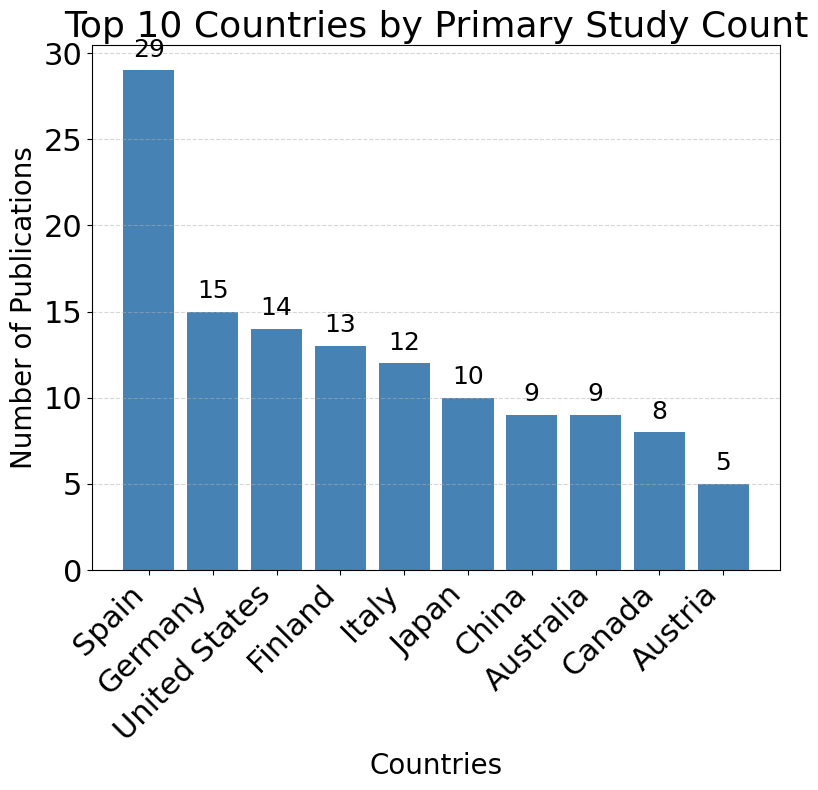

In [18]:
# Vertical chart for countries
plot_top10_bar_chart(df_countries_unique, "Country", "Publication Count",
                     title="Top 10 Countries by Primary Study Count",
                     filename="chart_top_10_countries",
                     orientation='vertical',
                     xlabel="Countries",
                     figsize=(8,8))

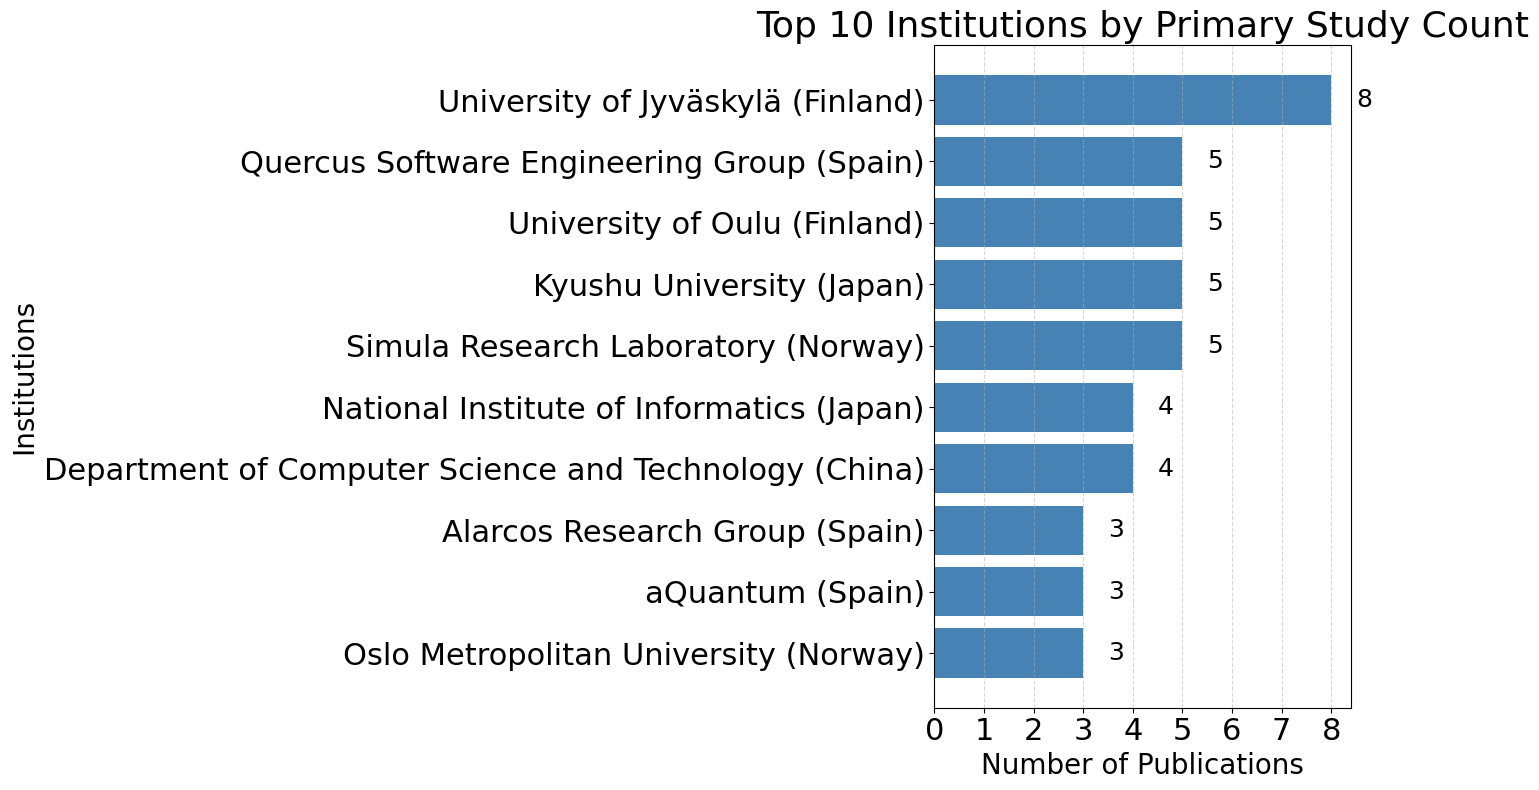

In [19]:
# Horizontal chart for institutions
plot_top10_bar_chart(df_affiliations_unique, "Institution (Country)", "Publication Count",
                     title="Top 10 Institutions by Primary Study Count",
                     filename="chart_top_10_institutions",
                     orientation='horizontal',
                     xlabel="Institutions",
                     figsize=(14,8))


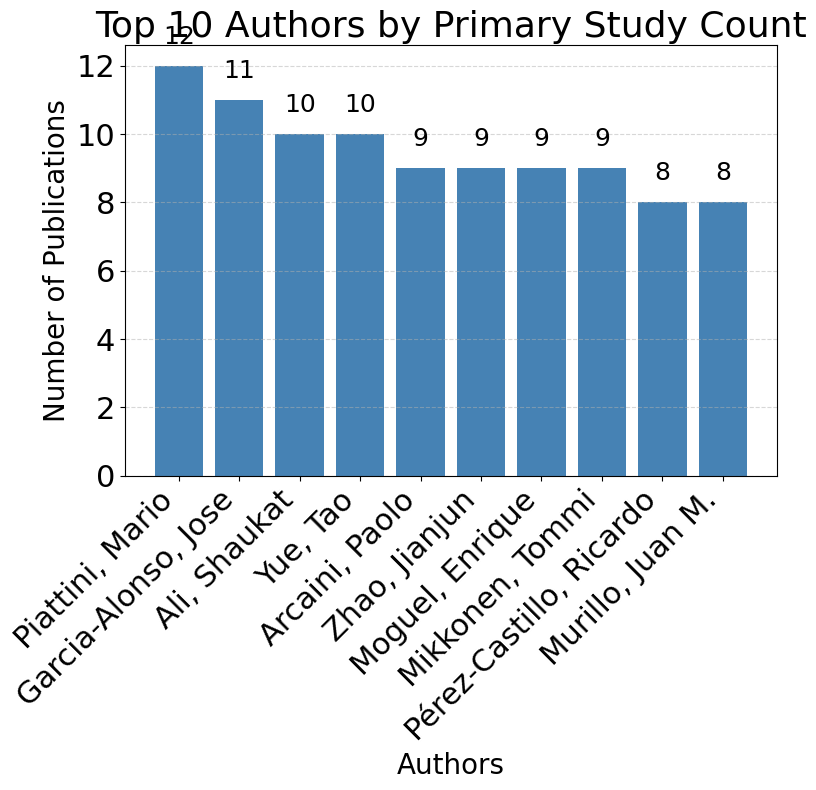

In [20]:
plot_top10_bar_chart(
    dataframe=df_authors,                # DataFrame gerado anteriormente
    column_label="Author",               # Coluna com os nomes completos
    column_value="Publication Count",    # Coluna com as contagens
    title="Top 10 Authors by Primary Study Count",
    filename="chart_top_10_authors",
    orientation='vertical',              # ou 'horizontal' se preferir
    xlabel="Authors",
    ylabel="Number of Publications",
    figsize=(8,8)
)

# RQ3 - Which areas of the software engineering are addressed by primary studies and what is the level of maturity of the evidence

### SWEBOK Areas

In [21]:
import pandas as pd
from collections import Counter

# === Counter for SWEBOK areas ===
swebok_counter = Counter()

# === Process each entry in the SWEBOK column ===
for value in df['SWEBOK'].dropna():
    areas = [area.strip() for area in value.split(';') if area.strip()]
    swebok_counter.update(areas)

# === Convert to sorted list of tuples ===
sorted_swebok = sorted(swebok_counter.items(), key=lambda x: x[1], reverse=True)

# === Display the frequencies ===
print("Frequency of SWEBOK Knowledge Areas:\n")
for area, count in sorted_swebok:
    print(f"- {area}: {count} publication(s)")

Frequency of SWEBOK Knowledge Areas:

- Software Engineering Models and Methods: 31 publication(s)
- Software Testing: 31 publication(s)
- Software Architecture: 19 publication(s)
- Software Quality: 11 publication(s)
- Software Construction: 10 publication(s)
- Software Engineering Process: 8 publication(s)
- The Software Engineering in General: 7 publication(s)
- Software Design: 6 publication(s)
- Software Security: 5 publication(s)
- Software Requirements: 4 publication(s)
- Software Maintenance: 3 publication(s)
- Software Engineering Operations: 2 publication(s)
- Software Engineering Management: 1 publication(s)
- Software Engineering Education: 1 publication(s)
- Software Engineering Economics: 1 publication(s)


### SE area

In [22]:
import pandas as pd
from collections import Counter

# === Counter for SE area ===
se_area_counter = Counter()

# === Process each entry in the SE area column ===
for value in df['SE area'].dropna():
    areas = [area.strip().capitalize() for area in value.split(';') if area.strip()]
    se_area_counter.update(areas)

# === Convert to sorted list of tuples ===
sorted_se_areas = sorted(se_area_counter.items(), key=lambda x: x[1], reverse=True)

# === Display the frequencies ===
print("Frequency of SE Areas:\n")
for area, count in sorted_se_areas:
    print(f"- {area}: {count}")

Frequency of SE Areas:

- Quantum software testing: 18
- Quantum model-driven engineering: 7
- Quantum software architecture: 7
- Quantum software as a service: 7
- Quantum software reuse: 6
- Quantum software construction: 5
- Quantum software metrics: 5
- Software engineering models and methods: 5
- Quantum software debugger: 4
- Quantum software security: 4
- Quantum software testing optimization: 4
- Quantum agile software development process: 3
- Quantum software development process: 3
- Quantum software engineering education methodology: 3
- Quantum software requirements: 3
- Quantum circuit optimization: 2
- Quantum code abstraction: 2
- Quantum code smells: 2
- Quantum reverse engineering: 2
- Quantum software architectural patterns: 2
- Quantum software engineering taxonomy: 2
- Quantum software modeling: 2
- Quantum software verification: 2
- Quantum testing flaky: 2
- Quantum uml modeling: 2
- ﻿object-oriented quantum model: 1
- Quantum artificial intelligence for automotive

### Maturity of Evidence

In [23]:
import pandas as pd
from collections import Counter

# === Counter for research types ===
research_type_counter = Counter()

# === Process each entry in the Research Type column ===
for value in df['Research Type of Primary Studies'].dropna():
    types = [t.strip() for t in value.split(';') if t.strip()]
    research_type_counter.update(types)

# === Sort and display ===
sorted_research_types = sorted(research_type_counter.items(), key=lambda x: x[1], reverse=True)

# === Print result ===
print("Frequency of Research Types (Primary Studies):\n")
for rtype, count in sorted_research_types:
    print(f"- {rtype}: {count} publication(s)")

Frequency of Research Types (Primary Studies):

- Proposal of solution: 73 publication(s)
- Evaluation research: 42 publication(s)
- Opinion papers: 19 publication(s)
- Personal experience papers: 4 publication(s)
- Philosophical papers: 2 publication(s)


### Charts

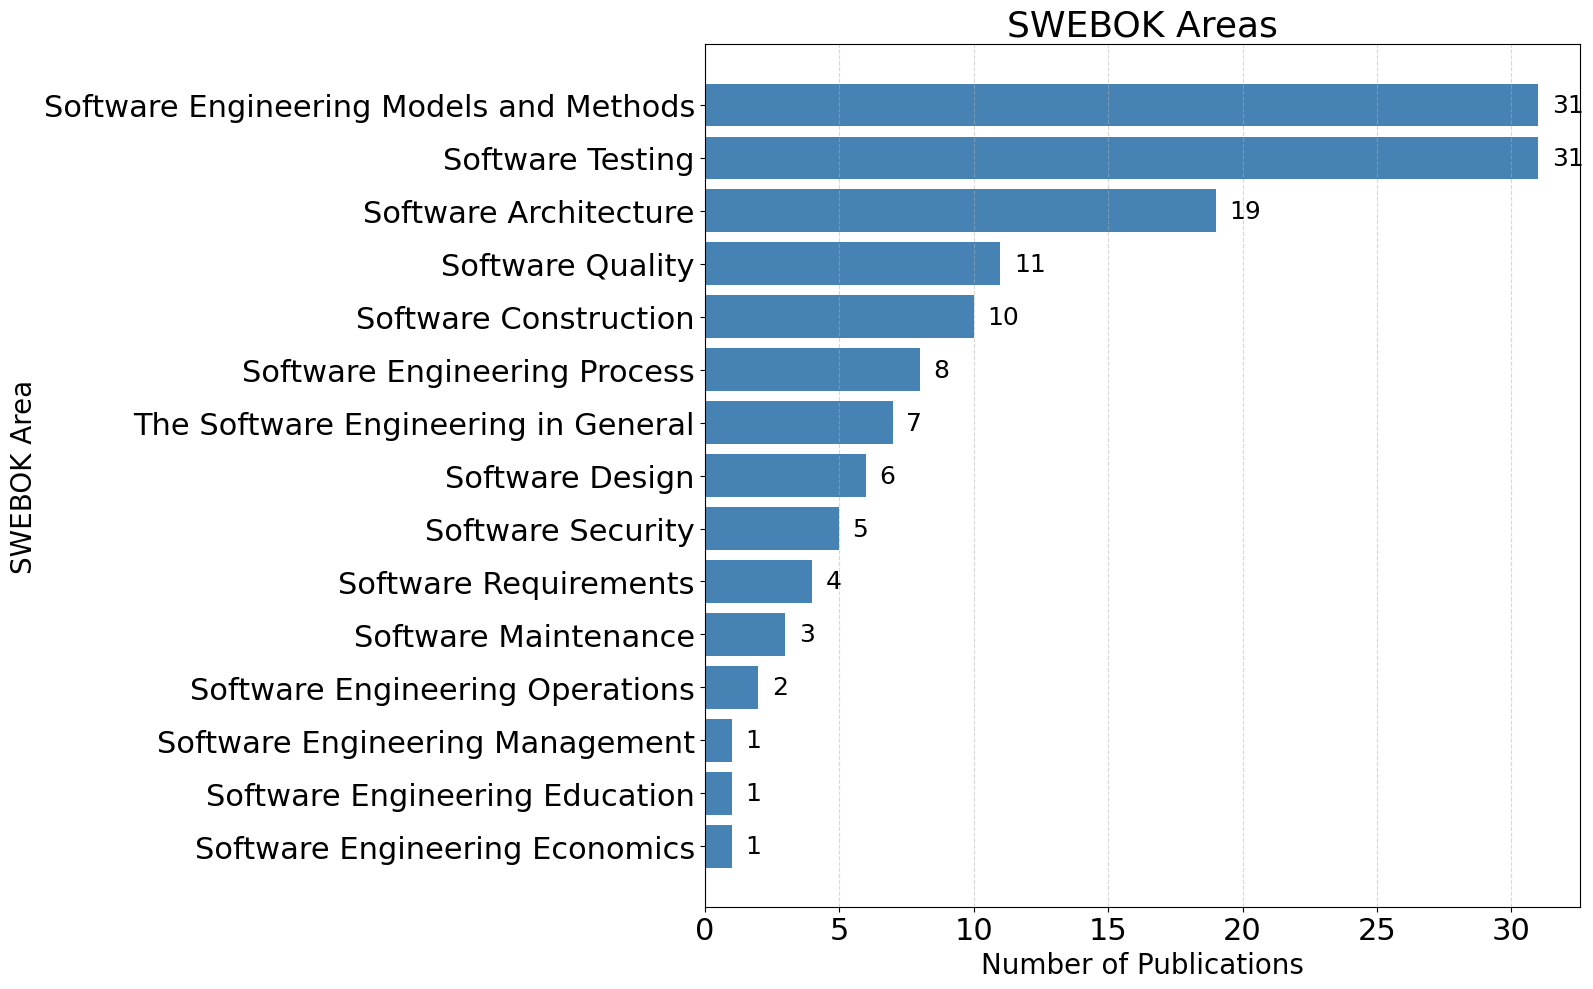

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os

# === Count SWEBOK occurrences ===
swebok_counter = Counter()

for value in df['SWEBOK'].dropna():
    areas = [area.strip() for area in value.split(';') if area.strip()]
    swebok_counter.update(areas)

# === Convert to DataFrame sorted by frequency ===
sorted_swebok = sorted(swebok_counter.items(), key=lambda x: x[1], reverse=True)
df_swebok = pd.DataFrame(sorted_swebok, columns=["SWEBOK Area", "Frequency"])

# === Plot: horizontal bar chart ===
plt.figure(figsize=(16, 10))
bars = plt.barh(df_swebok["SWEBOK Area"], df_swebok["Frequency"], color="steelblue")

plt.title("SWEBOK Areas", fontsize=CHART_TITLE_SIZE)
plt.xlabel("Number of Publications", fontsize=CHART_XLABEL_SIZE)
plt.ylabel("SWEBOK Area", fontsize=CHART_YLABEL_SIZE)
plt.xticks(fontsize=CHART_XTICKS_SIZE)
plt.yticks(fontsize=CHART_YTICKS_SIZE)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()

# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             str(width), va='center', fontsize=CHART_TEXT_SIZE)

# Save and show
os.makedirs("charts", exist_ok=True)
plt.tight_layout()
plt.savefig("charts/chart_swebok_horizontal.pdf", format='pdf')
plt.show()

In [25]:
from collections import Counter

# Filtrar e limpar os dados
df_filtered = df[["ID", "Title", "SWEBOK", "Study goal and contribution", "Study review", "SE area"]].copy()
df_filtered["SE area"] = df_filtered["SE area"].str.strip()
df_filtered["SWEBOK"] = df_filtered["SWEBOK"].str.strip()

# Contar número de artigos por SE area
se_area_counts = df_filtered["SE area"].value_counts()

# Ordenar as SE areas por número de artigos (decrescente)
ordered_areas = se_area_counts.index.tolist()

# Imprimir agrupado por SE area e SWEBOK
for area in ordered_areas:
    group_area = df_filtered[df_filtered["SE area"] == area]
    print(f"=== {area} ({len(group_area)} artigos) ===")

    for swebok, group_swebok in group_area.groupby("SWEBOK", observed=True):
        print(f"={swebok}=")

        for _, row in group_swebok.iterrows():
            print(f'{row["ID"]} - {row["Title"]}')
            print(row["Study goal and contribution"])
            print(row["Study review"])
            print()
            print()

=== Quantum software testing (17 artigos) ===
=Software Testing=
SCP0103 - On testing quantum programs
O artigo tem como objetivo discutir a importância da adoção de práticas de engenharia de software no contexto da computação quântica, com foco específico nas atividades de teste de software. Para iniciar essa discussão, os autores apresentam desafios relacionados à aplicação de testes white-box e black-box, bem como às práticas de verificação e validação de programas que executam em computadores quânticos, destacando as limitações dos métodos tradicionais diante das propriedades probabilísticas e das restrições tecnológicas desses sistemas.

Como principais contribuições, o estudo identifica práticas de engenharia de software que podem ser adaptadas, como revisão de código e uso de simuladores para testes, além de destacar práticas que exigem adaptações ou desenvolvimento de novas abordagens, como a impossibilidade de debug interativo e a complexidade da validação em algoritmos como o

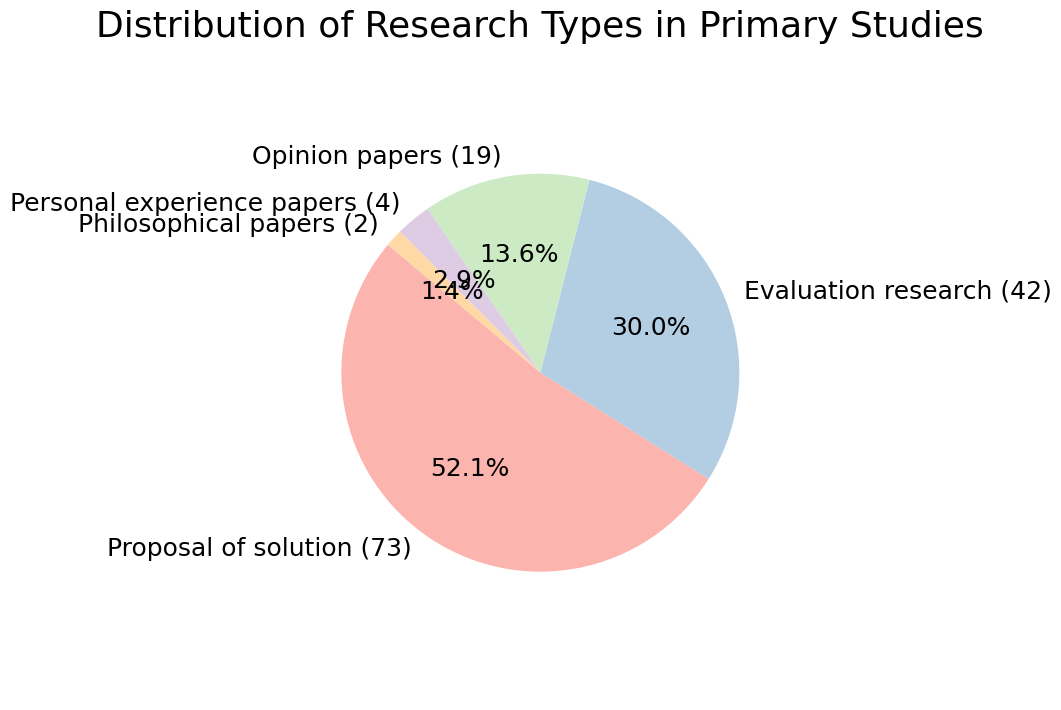

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

# === Count occurrences from column ===
research_type_counter = Counter()

for value in df['Research Type of Primary Studies'].dropna():
    types = [typ.strip() for typ in value.split(';') if typ.strip()]
    research_type_counter.update(types)

# === Convert to sorted DataFrame ===
sorted_types = sorted(research_type_counter.items(), key=lambda x: x[1], reverse=True)
df_research_types = pd.DataFrame(sorted_types, columns=["Research Type", "Count"])

# === Plot: Pie chart with uniform style ===
plt.figure(figsize=(10, 7.2))
colors = plt.cm.Pastel1.colors
total = sum(df_research_types["Count"])

# Create labels like: "Empirical Study (12)"
labels = [f"{row['Research Type']} ({row['Count']})" for _, row in df_research_types.iterrows()]
sizes = df_research_types["Count"]

# No explode (all slices uniform)
explode = [0 for _ in labels]

# === Plotting ===
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%",
    explode=explode,
    startangle=140,
    colors=colors,
    textprops={'fontsize': CHART_TEXT_SIZE}
)

# Format percent text inside chart
for autotext in autotexts:
    autotext.set_fontsize(CHART_TEXT_SIZE)
    autotext.set_color('black')

# === Final touches ===
plt.title("Distribution of Research Types in Primary Studies", fontsize=CHART_TITLE_SIZE)
plt.axis('equal')  # Draw pie as a circle

# Save chart
os.makedirs("charts", exist_ok=True)
plt.tight_layout()
plt.savefig("charts/chart_research_types_pie.pdf", format='pdf')
plt.show()

### SE areas detailed